In [1]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

In [2]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        # initialize weights
        W_in = 0.01*np.random.randn(V, H).astype('f')
        W_out = 0.01*np.random.randn(H, V).astype('f')
        
        # Layers
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        #
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        #
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1)*0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
        
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None
    

In [3]:
# learning: trainer
import sys
sys.path.append('..')
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 226 |  반복 1 / 2 | 시간 0[s] | 손실 1.29
| 에폭 227 |  반복 1 / 2 | 시간 0[s] | 손실 1.09
| 에폭 228 |  반복 1 / 2 | 시간 0[s] | 손실 1.13
| 에폭 229 |  반복 1 / 2 | 시간 0[s] | 손실 1.09
| 에폭 230 |  반복 1 / 2 | 시간 0[s] | 손실 1.21
| 에폭 231 |  반복 1 / 2 | 시간 0[s] | 손실 1.13
| 에폭 232 |  반복 1 / 2 | 시간 0[s] | 손실 1.06
| 에폭 233 |  반복 1 / 2 | 시간 0[s] | 손실 1.20
| 에폭 234 |  반복 1 / 2 | 시간 0[s] | 손실 1.12
| 에폭 235 |  반복 1 / 2 | 시간 0[s] | 손실 1.12
| 에폭 236 |  반복 1 / 2 | 시간 0[s] | 손실 1.13
| 에폭 237 |  반복 1 / 2 | 시간 0[s] | 손실 1.12
| 에폭 238 |  반복 1 / 2 | 시간 0[s] | 손실 1.11
| 에폭 239 |  반복 1 / 2 | 시간 0[s] | 손실 1.11
| 에폭 240 |  반복 1 / 2 | 시간 0[s] | 손실 1.18
| 에폭 241 |  반복 1 / 2 | 시간 0[s] | 손실 1.04
| 에폭 242 |  반복 1 / 2 | 시간 0[s] | 손실 1.12
| 에폭 243 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 244 |  반복 1 / 2 | 시간 0[s] | 손실 1.10
| 에폭 245 |  반복 1 / 2 | 시간 0[s] | 손실 1.16
| 에폭 246 |  반복 1 / 2 | 시간 0[s] | 손실 1.09
| 에폭 247 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 248 |  반복 1 / 2 | 시간 0[s] | 손실 1.16
| 에폭 249 |  반복 1 / 2 | 시간 0[s] | 손실 1.02
| 에폭 250 |  반복 1

| 에폭 437 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 438 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 439 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 440 |  반복 1 / 2 | 시간 0[s] | 손실 0.77
| 에폭 441 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 442 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 443 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 444 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 445 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 446 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 447 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 448 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 449 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 450 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 451 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 452 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 453 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 454 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 455 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 456 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 457 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 458 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 459 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 460 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 461 |  반복 1

| 에폭 676 |  반복 1 / 2 | 시간 1[s] | 손실 0.80
| 에폭 677 |  반복 1 / 2 | 시간 1[s] | 손실 0.52
| 에폭 678 |  반복 1 / 2 | 시간 1[s] | 손실 0.64
| 에폭 679 |  반복 1 / 2 | 시간 1[s] | 손실 0.80
| 에폭 680 |  반복 1 / 2 | 시간 1[s] | 손실 0.64
| 에폭 681 |  반복 1 / 2 | 시간 1[s] | 손실 0.61
| 에폭 682 |  반복 1 / 2 | 시간 1[s] | 손실 0.56
| 에폭 683 |  반복 1 / 2 | 시간 1[s] | 손실 0.58
| 에폭 684 |  반복 1 / 2 | 시간 1[s] | 손실 0.74
| 에폭 685 |  반복 1 / 2 | 시간 1[s] | 손실 0.78
| 에폭 686 |  반복 1 / 2 | 시간 1[s] | 손실 0.50
| 에폭 687 |  반복 1 / 2 | 시간 1[s] | 손실 0.74
| 에폭 688 |  반복 1 / 2 | 시간 1[s] | 손실 0.71
| 에폭 689 |  반복 1 / 2 | 시간 1[s] | 손실 0.52
| 에폭 690 |  반복 1 / 2 | 시간 1[s] | 손실 0.63
| 에폭 691 |  반복 1 / 2 | 시간 1[s] | 손실 0.78
| 에폭 692 |  반복 1 / 2 | 시간 1[s] | 손실 0.66
| 에폭 693 |  반복 1 / 2 | 시간 1[s] | 손실 0.65
| 에폭 694 |  반복 1 / 2 | 시간 1[s] | 손실 0.52
| 에폭 695 |  반복 1 / 2 | 시간 1[s] | 손실 0.56
| 에폭 696 |  반복 1 / 2 | 시간 1[s] | 손실 0.64
| 에폭 697 |  반복 1 / 2 | 시간 1[s] | 손실 0.73
| 에폭 698 |  반복 1 / 2 | 시간 1[s] | 손실 0.65
| 에폭 699 |  반복 1 / 2 | 시간 1[s] | 손실 0.63
| 에폭 700 |  반복 1

| 에폭 902 |  반복 1 / 2 | 시간 1[s] | 손실 0.66
| 에폭 903 |  반복 1 / 2 | 시간 1[s] | 손실 0.50
| 에폭 904 |  반복 1 / 2 | 시간 1[s] | 손실 0.49
| 에폭 905 |  반복 1 / 2 | 시간 1[s] | 손실 0.57
| 에폭 906 |  반복 1 / 2 | 시간 1[s] | 손실 0.57
| 에폭 907 |  반복 1 / 2 | 시간 1[s] | 손실 0.64
| 에폭 908 |  반복 1 / 2 | 시간 1[s] | 손실 0.57
| 에폭 909 |  반복 1 / 2 | 시간 1[s] | 손실 0.53
| 에폭 910 |  반복 1 / 2 | 시간 1[s] | 손실 0.59
| 에폭 911 |  반복 1 / 2 | 시간 1[s] | 손실 0.52
| 에폭 912 |  반복 1 / 2 | 시간 1[s] | 손실 0.60
| 에폭 913 |  반복 1 / 2 | 시간 1[s] | 손실 0.66
| 에폭 914 |  반복 1 / 2 | 시간 1[s] | 손실 0.60
| 에폭 915 |  반복 1 / 2 | 시간 1[s] | 손실 0.50
| 에폭 916 |  반복 1 / 2 | 시간 1[s] | 손실 0.64
| 에폭 917 |  반복 1 / 2 | 시간 1[s] | 손실 0.57
| 에폭 918 |  반복 1 / 2 | 시간 1[s] | 손실 0.54
| 에폭 919 |  반복 1 / 2 | 시간 1[s] | 손실 0.49
| 에폭 920 |  반복 1 / 2 | 시간 1[s] | 손실 0.55
| 에폭 921 |  반복 1 / 2 | 시간 1[s] | 손실 0.61
| 에폭 922 |  반복 1 / 2 | 시간 1[s] | 손실 0.65
| 에폭 923 |  반복 1 / 2 | 시간 1[s] | 손실 0.46
| 에폭 924 |  반복 1 / 2 | 시간 1[s] | 손실 0.57
| 에폭 925 |  반복 1 / 2 | 시간 1[s] | 손실 0.55
| 에폭 926 |  반복 1

C:\Users\eunbi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eunbi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eunbi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eunbi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\eunbi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\eunbi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from cur

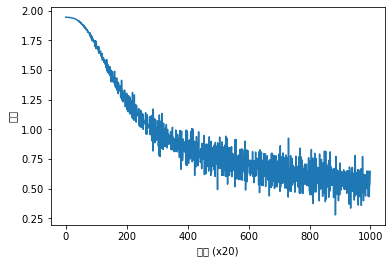

In [4]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [5]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 1.1095822 -0.9230835  1.5164391 -1.0167651  1.0141009]
say [-1.1677442  1.1643443  0.2706599  1.1354512 -1.1363683]
goodbye [ 0.7796082 -1.0212945  0.354676  -0.9386436  0.8798701]
and [-0.8028879  0.8085973  1.8713725  0.8001396 -0.7840066]
i [ 0.7820091  -1.0325003   0.36321336 -0.95101935  0.8727062 ]
hello [ 1.1375598 -0.9186825  1.5182885 -1.0114114  1.0055907]
. [-1.132801   1.1837915 -1.6572362  1.1715087 -1.2048122]
